# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 6: *TemplateMatching*
Compute the matching of a template in an image
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from PrintUtilities import printProgress
from ImagePropertiesUtilities import imageMaxMin
from PlotUtilities import plot3DHistogram 

# Iteration
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    templateName = Input template image name
    thresholdVal = Only pixels in the template with value greater that this are used
                   -1 to use all pixels or 0  to use edges with value >0

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter6/Input/")
imageName = "Eye.png"
templateName = "EyeTemplate.png"
thresholdVal = -1 

### # Read and show input and template images

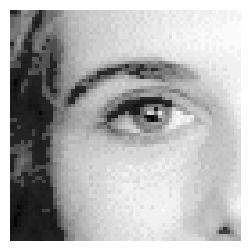

In [4]:
inputImage, width, height = imageReadL(pathToDir + imageName)
templateImage, widthTemplate, heightTemplate = imageReadL(pathToDir + templateName)

plotImageL(inputImagee, figureSize = 3)
plotImageL(templateImagee, figureSize = 3)

### Template matching

In [ ]:
# Create an accumulator. We look in a reduced size image
accumulator = createImageF(width, height)
  
# Template matching
templateCentreX = int((widthTemplate - 1) / 2)
templateCentreY = int((heightTemplate - 1) / 2)
for x in range(0, width):  
    printProgress(x, width)
    for y in range(0, height):
        for wx,wy in itertools.product(range(0, widthTemplate), range(0, heightTemplate)):
            posY = y + wy - templateCentreY
            posX = x + wx - templateCentreX 
            
            # The threshold is used to accumulate only the edge pixels in an edge template
            # The difference of pixel values is inverted to show the best match as a peak
            if posY > -1 and posY <  height and  posX > -1 and posX <  width and            \
               templateImage[wy,wx] > thresholdVal:
                diff = 1.0 - abs(float(inputImage[posY,posX]) -                             \
                                 float(templateImage[wy, wx])) / 255.0
                
                accumulator[y,x] += diff*diff 

### Show accumulator within a maxima and mininma region

In [ ]:
maxima, minima = imageMaxMin(accumulator)
plotImageF(accumulator, figureSize = 3)
plot3DHistogram(accumulator, [minima, maxima])